# Proyecto para la materia de minería de datos FI UNAM 2022-2

## Equipo 11

## Importar bibliotecas y el dataset

In [42]:
#Se importan las bibliotecas correspondientes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Se define la ruta del dataset
path="../Data-files/DataSet.csv"
data_bank_df = pd.read_csv(path)

In [3]:
#Revisamos la carga correcta de los datos
data_bank_df.head(5)

,NUM_SOLICITUD,SUCURSAL,STATUS_SOLICITUD,PUNTO_DECISION,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,SALDO_CUENTA,...,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,PEOR_HISTORIA_CREDITO,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,2.010000e+16,4357,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Renta,Preparatoria
1,2.010000e+16,164,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Licenciatura
2,2.010000e+16,306,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Preparatoria
3,2.010000e+16,951,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,1665,450,0,0,0,25,Renta,Posgrado
4,2.010000e+16,522,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,30397,1830,0,17050,0,25,Renta,Licenciatura


In [4]:
#Revisamos los tipos de datos que tenemos, por si es necesario modificar algunos
data_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUM_SOLICITUD            4200 non-null   float64
 1   SUCURSAL                 4200 non-null   int64  
 2   STATUS_SOLICITUD         4200 non-null   object 
 3   PUNTO_DECISION           4200 non-null   object 
 4   APROBACION_TC            4200 non-null   object 
 5   TIPO_CTE                 4200 non-null   object 
 6   LINEA_CREDITO_FINAL      4200 non-null   int64  
 7   CUENTA_ASIGNADA          1281 non-null   float64
 8   MESES_VENCIDOS           1281 non-null   float64
 9   SALDO_CUENTA             1281 non-null   object 
 10  CAPACIDAD_TC             1279 non-null   object 
 11  INGRESO_INFERIDO         4200 non-null   int64  
 12  COMPROBANTE_INGRESOS     4200 non-null   object 
 13  SEGMENTO_CLIENTE         1369 non-null   object 
 14  CLIENTE_CDE             

In [5]:
#Obtenemos algunos estadísticos de los datos
data_bank_df.describe()

,NUM_SOLICITUD,SUCURSAL,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,PEOR_HISTORIA_CREDITO,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD
count,4.200000e+03,4200.000000,4200.000000,1.281000e+03,1281.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.0,4200.000000,4200.000000,4200.000000
mean,2.010000e+16,4592.057619,9941.035952,9.980000e+14,0.891491,43081.393571,9821.183810,2.026905,136.223333,223.941905,0.264524,3721.347381,357.659762,0.0,7690.722381,0.002143,42.615238
std,0.000000e+00,6616.573047,29516.629026,0.000000e+00,0.834752,25502.797773,34077.208942,1.798888,60.292299,338.787351,0.897340,13375.637563,2963.271226,0.0,34243.413431,0.051138,10.330894
min,2.010000e+16,1.000000,0.000000,9.980000e+14,0.000000,4500.000000,0.000000,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,25.000000
25%,2.010000e+16,433.000000,0.000000,9.980000e+14,0.000000,21783.750000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,34.000000
50%,2.010000e+16,4269.000000,0.000000,9.980000e+14,1.000000,35906.500000,0.000000,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,43.000000
75%,2.010000e+16,7631.000000,6000.000000,9.980000e+14,2.000000,60109.000000,0.000000,4.000000,205.000000,706.000000,0.000000,218.500000,0.000000,0.0,0.000000,0.000000,52.000000
max,2.010000e+16,86000.000000,687000.000000,9.980000e+14,3.000000,119261.000000,680500.000000,5.000000,297.000000,805.000000,19.000000,210437.000000,95758.000000,0.0,717380.000000,2.000000,60.000000


In [6]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
data_bank_df.duplicated().sum()

0

In [7]:
#Revisamos si existen datos faltantes
data_bank_df.isnull().sum()

NUM_SOLICITUD                 0
SUCURSAL                      0
STATUS_SOLICITUD              0
PUNTO_DECISION                0
APROBACION_TC                 0
TIPO_CTE                      0
LINEA_CREDITO_FINAL           0
CUENTA_ASIGNADA            2919
MESES_VENCIDOS             2919
SALDO_CUENTA               2919
CAPACIDAD_TC               2921
INGRESO_INFERIDO              0
COMPROBANTE_INGRESOS          0
SEGMENTO_CLIENTE           2831
CLIENTE_CDE                   0
SUMA_LINEAS_REVOLVENTES       0
NIVEL_RIESGO                  0
CAPACIDAD_PAGO_TOTAL          0
SOLICITUDES_RECHAZADAS        0
SCORE_CLIENTE                 0
SCORE_COMPORTAMIENTO          0
PEOR_MOP_TARJETAS             0
SUMA_SALDOS_TARJETAS          0
SUMA_PAGO_MIN_TARJETAS        0
PEOR_HISTORIA_CREDITO         0
SUMA_SALDOS_TOTAL             0
NUM_CREDITOS                  0
EDAD                          0
TIPO_VIVIENDA                 0
ESCOLARIDAD                   0
dtype: int64

In [8]:
#Se modifica el valor de APROBACIÓN TC
#Se dejará sólo en Aprobado y rechazado,.Pre-aprobado se cambiará a aprobado 

In [9]:
data_bank_df.loc[(data_bank_df['APROBACION_TC'] == "Pre-Aprobado"), 'APROBACION_TC']="Aprobado"

## Visualización de los datos

In [10]:
#Eliminamos algunas columnas innecesarias como la sucursal o el número de cuenta
columns_to_delete=["NUM_SOLICITUD","STATUS_SOLICITUD",
                    "CUENTA_ASIGNADA","MESES_VENCIDOS","SALDO_CUENTA","CAPACIDAD_TC",
                    "SEGMENTO_CLIENTE","CAPACIDAD_PAGO_TOTAL","PEOR_HISTORIA_CREDITO",
                    "NUM_CREDITOS", ]
data_bank_df.drop(columns_to_delete, axis = 1, inplace = True)

In [11]:
# Reemplazamos la columna APROBACION_TC por enteros antes de poder llevar a cabo cualquier visualización
# ya que será nuestra variable objetivo
data_bank_df['APROBACION_TC'] = data_bank_df['APROBACION_TC'].apply(lambda x: 1 if x == 'Aprobado' else 0)

In [12]:
data_bank_df.head(1)

,SUCURSAL,PUNTO_DECISION,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,COMPROBANTE_INGRESOS,CLIENTE_CDE,SUMA_LINEAS_REVOLVENTES,NIVEL_RIESGO,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,4357,PS1,0,MALO,0,4500,RECIBOS DE NOMINA,NO_CLIENTE,0,Alto,5,89,0,0,0,0,0,25,Renta,Preparatoria


### Boxplot

<AxesSubplot:xlabel='SUCURSAL', ylabel='TIPO_CTE'>

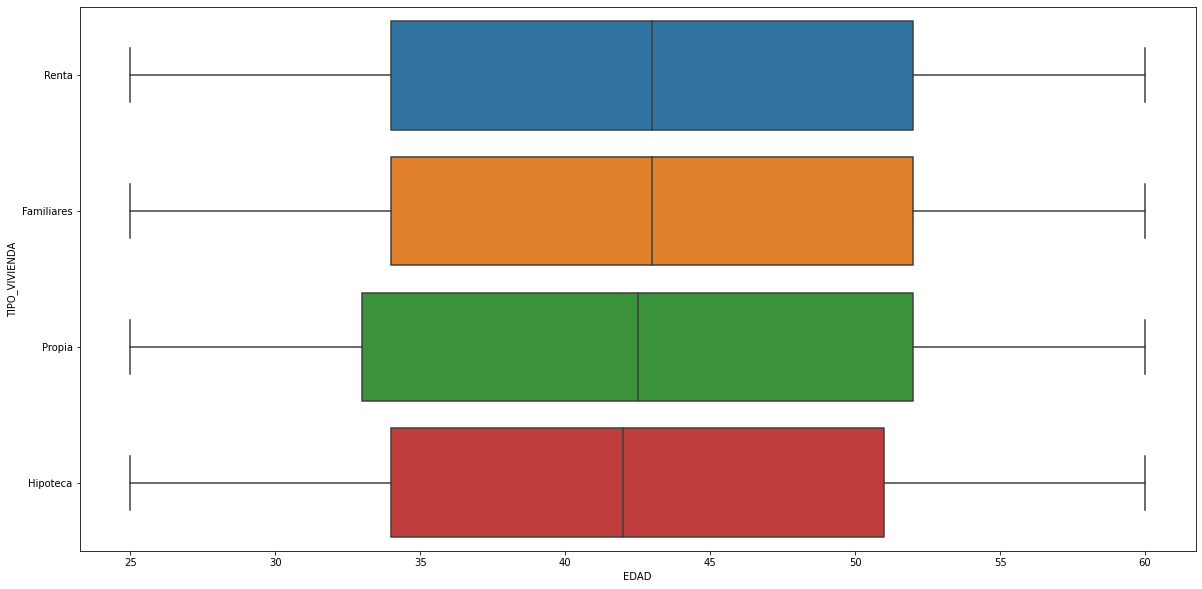

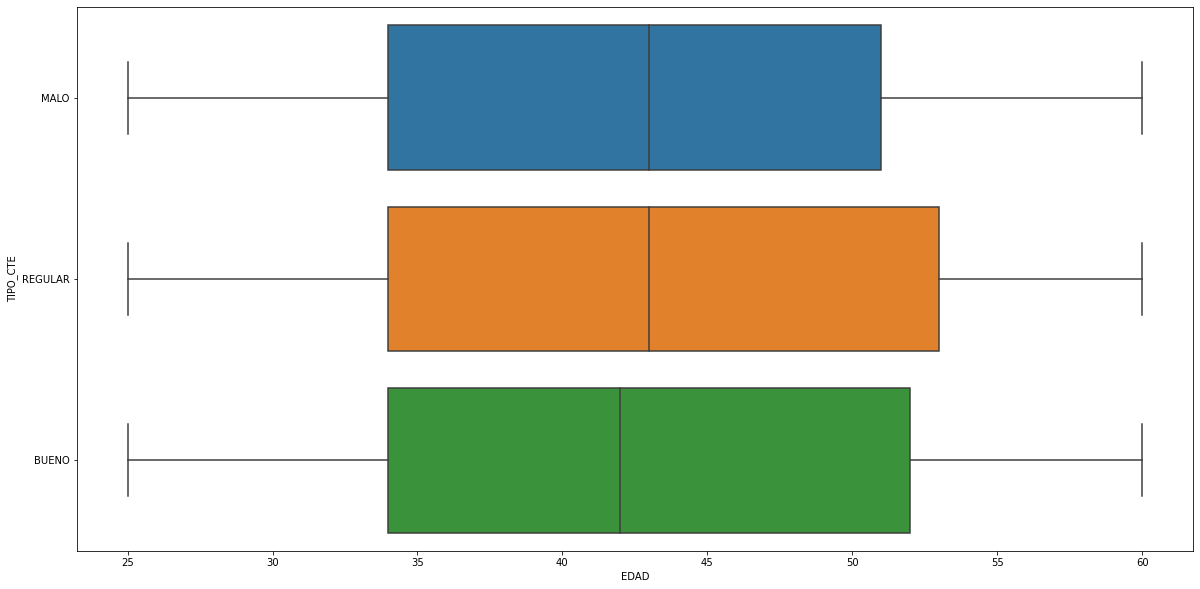

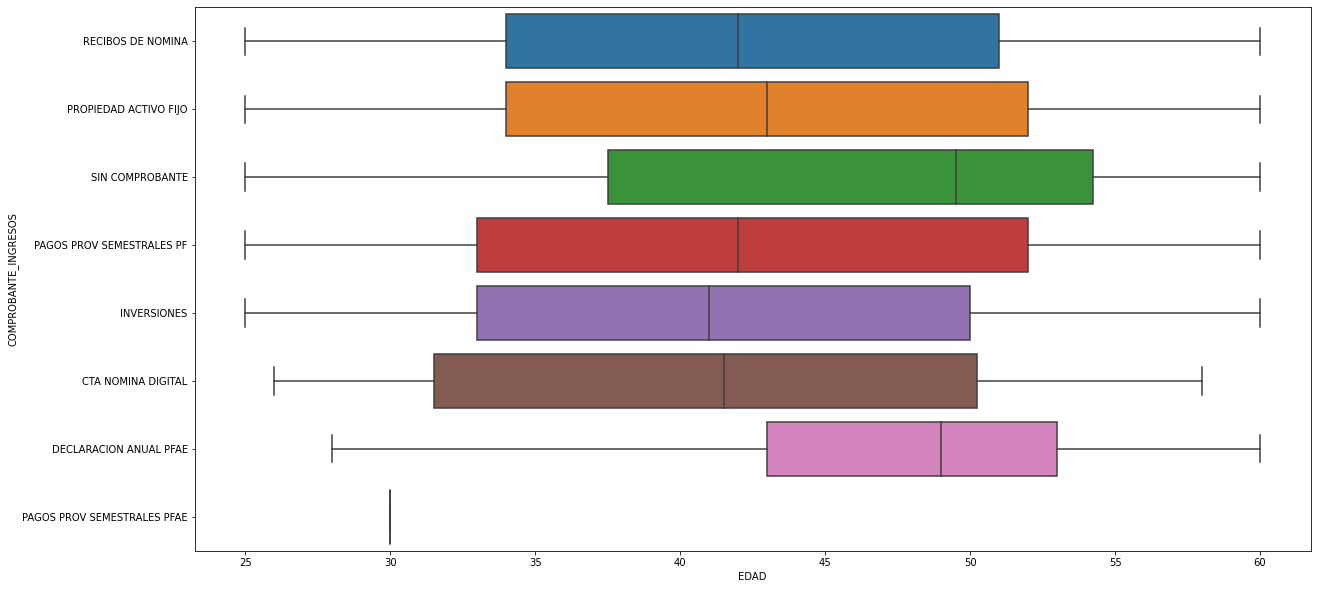

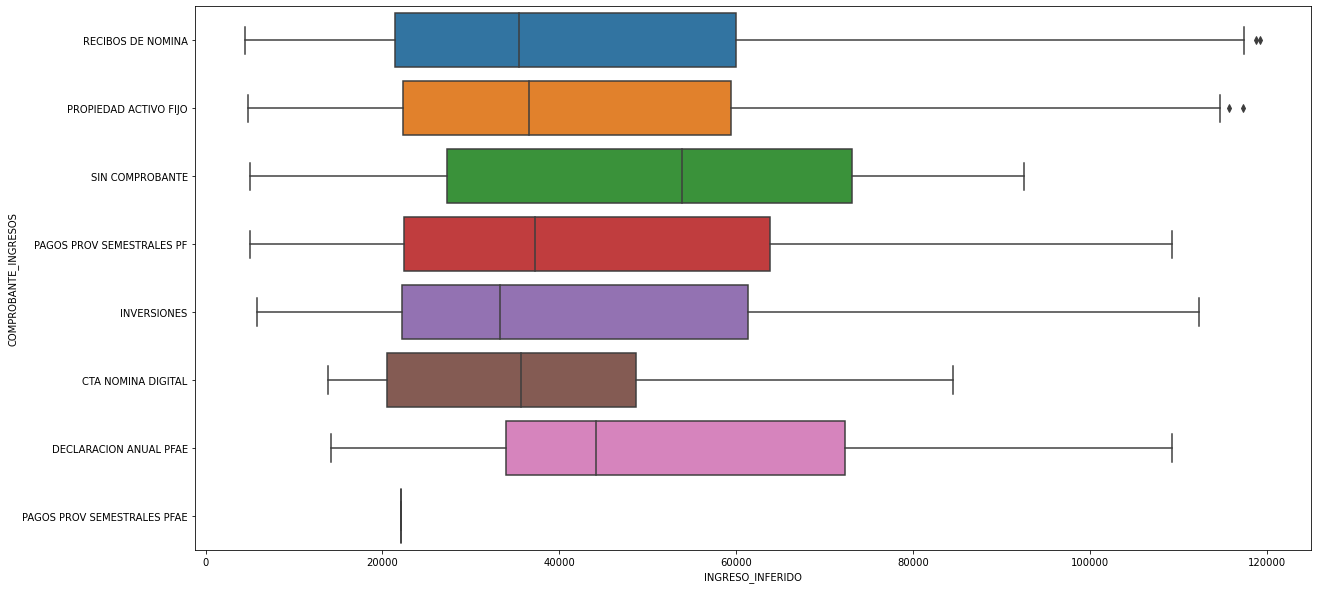

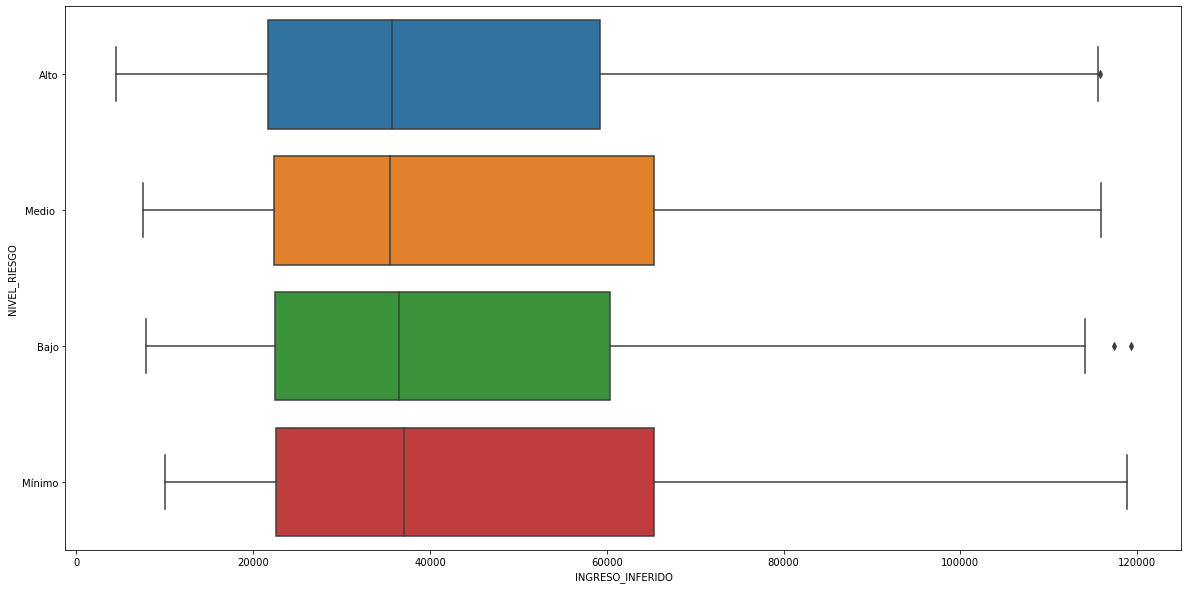

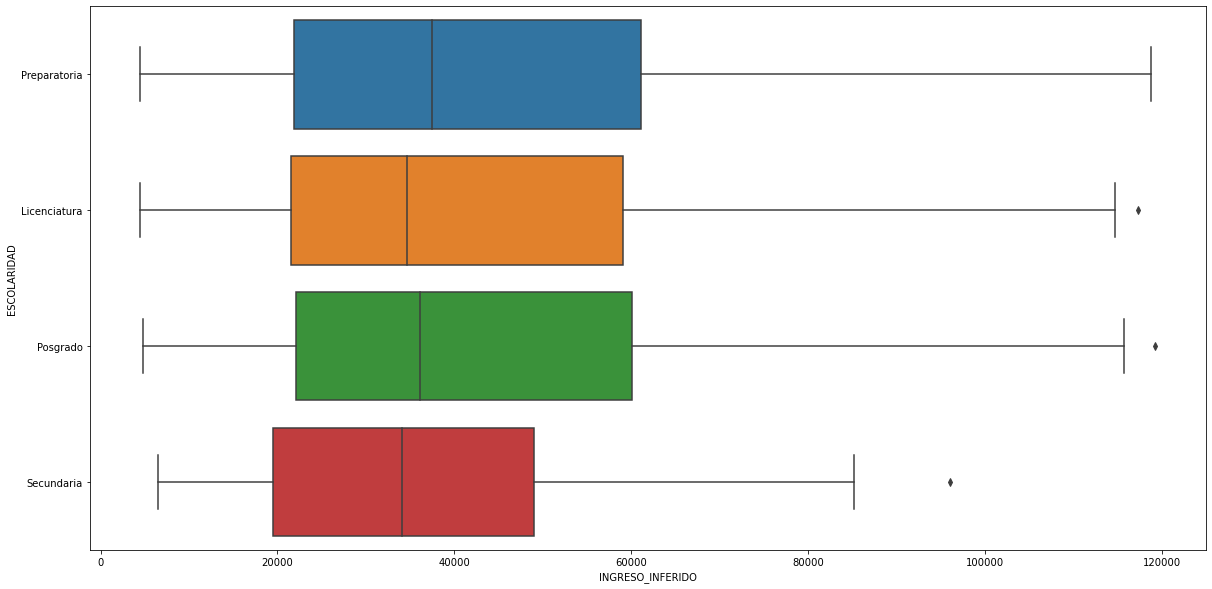

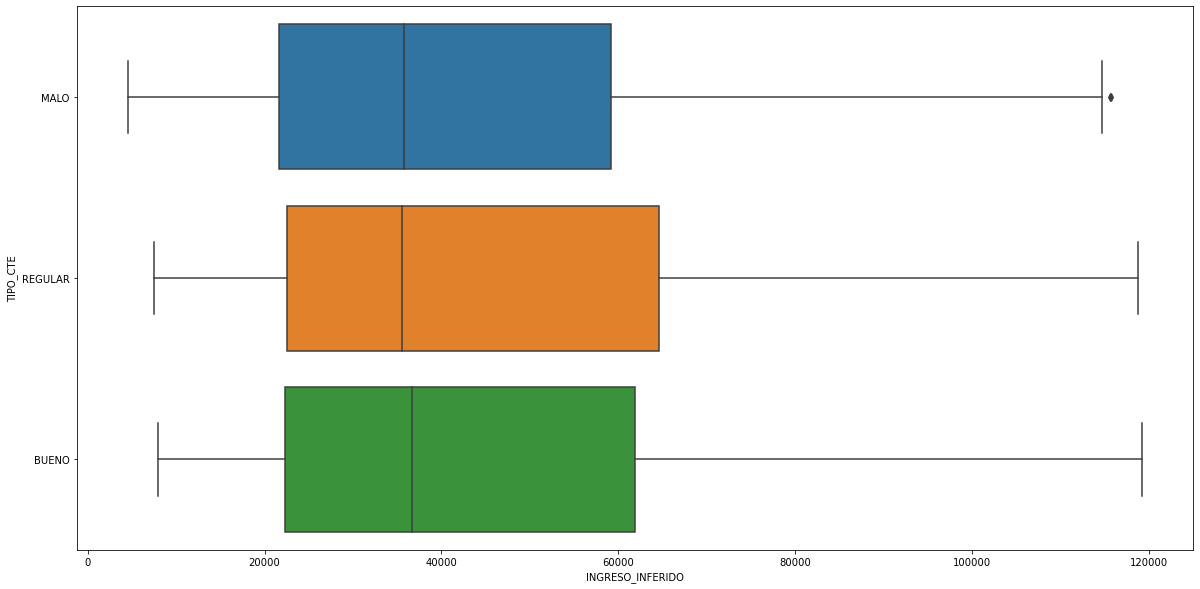

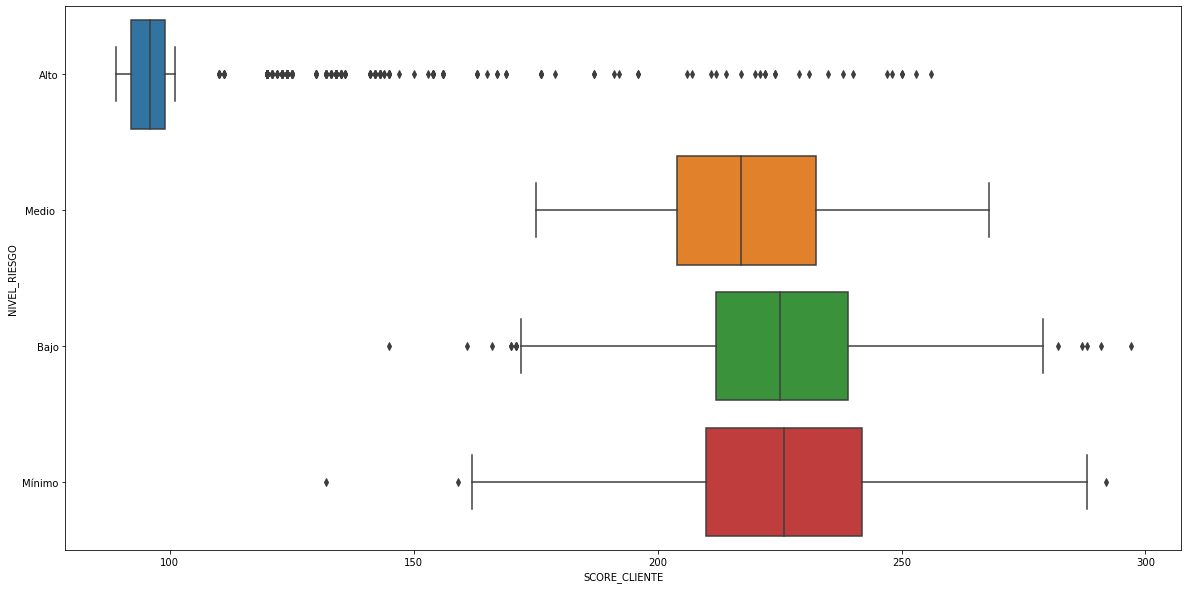

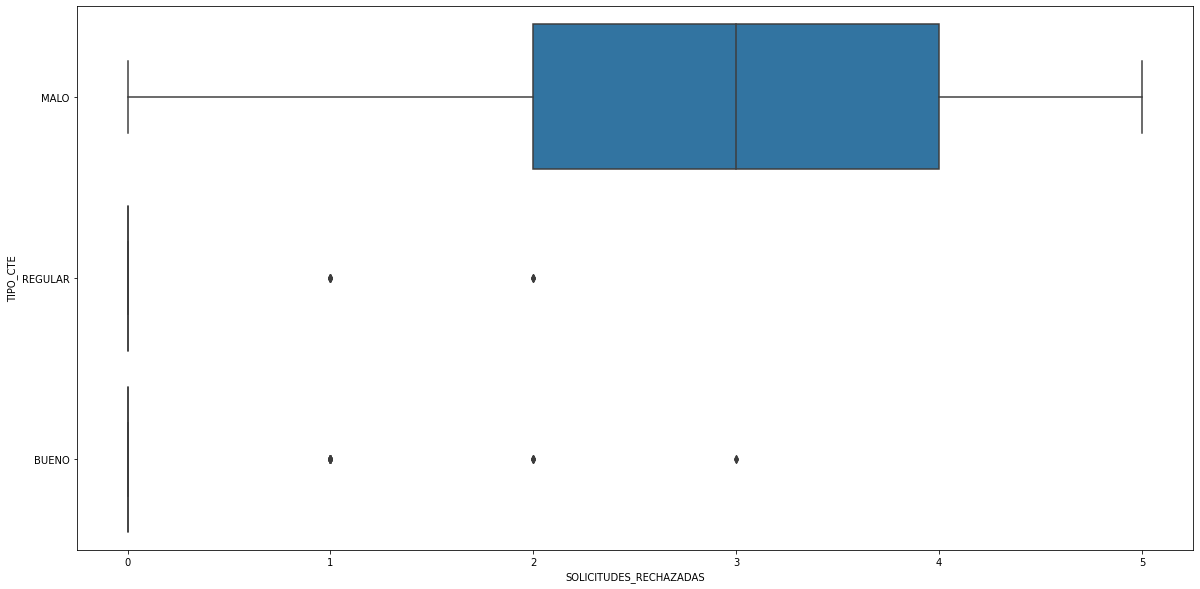

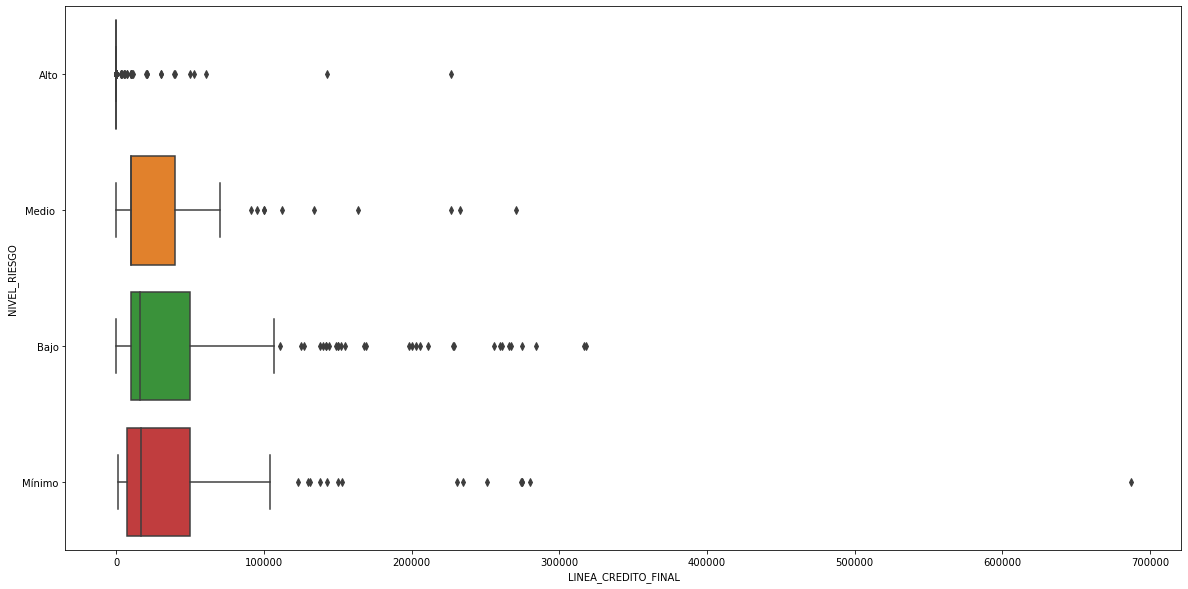

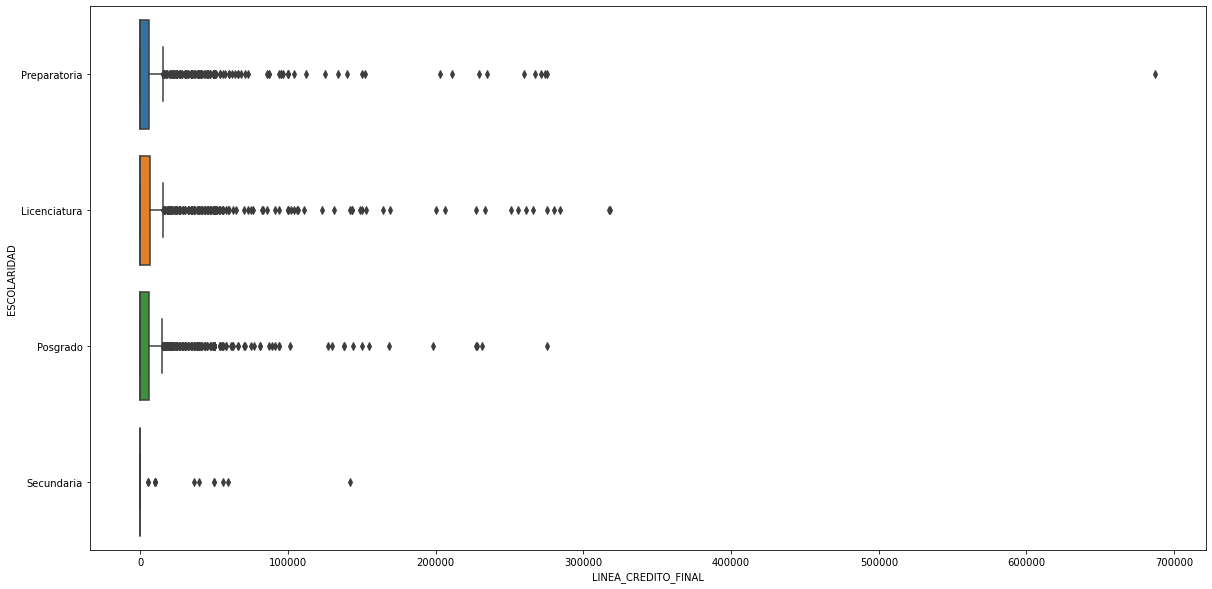

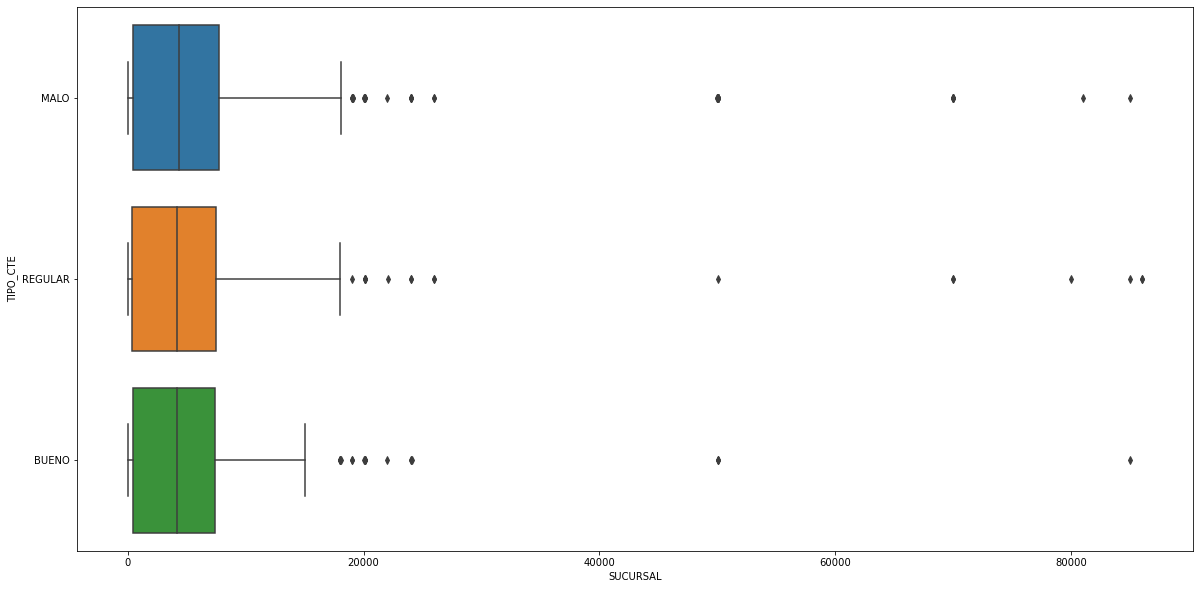

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'EDAD', y = 'TIPO_VIVIENDA', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'EDAD', y = 'TIPO_CTE', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'EDAD', y = 'COMPROBANTE_INGRESOS', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'INGRESO_INFERIDO', y = 'COMPROBANTE_INGRESOS', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'INGRESO_INFERIDO', y = 'NIVEL_RIESGO', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'INGRESO_INFERIDO', y = 'ESCOLARIDAD', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'INGRESO_INFERIDO', y = 'TIPO_CTE', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'SCORE_CLIENTE', y = 'NIVEL_RIESGO', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'SOLICITUDES_RECHAZADAS', y = 'TIPO_CTE', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'LINEA_CREDITO_FINAL', y = 'NIVEL_RIESGO', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'LINEA_CREDITO_FINAL', y = 'ESCOLARIDAD', data = data_bank_df)

plt.figure(figsize=(20, 10))
sns.boxplot(x = 'SUCURSAL', y = 'TIPO_CTE', data = data_bank_df)



array([[<AxesSubplot:title={'center':'SUCURSAL'}>,
        <AxesSubplot:title={'center':'APROBACION_TC'}>,
        <AxesSubplot:title={'center':'LINEA_CREDITO_FINAL'}>,
        <AxesSubplot:title={'center':'INGRESO_INFERIDO'}>],
       [<AxesSubplot:title={'center':'SUMA_LINEAS_REVOLVENTES'}>,
        <AxesSubplot:title={'center':'SOLICITUDES_RECHAZADAS'}>,
        <AxesSubplot:title={'center':'SCORE_CLIENTE'}>,
        <AxesSubplot:title={'center':'SCORE_COMPORTAMIENTO'}>],
       [<AxesSubplot:title={'center':'PEOR_MOP_TARJETAS'}>,
        <AxesSubplot:title={'center':'SUMA_SALDOS_TARJETAS'}>,
        <AxesSubplot:title={'center':'SUMA_PAGO_MIN_TARJETAS'}>,
        <AxesSubplot:title={'center':'SUMA_SALDOS_TOTAL'}>],
       [<AxesSubplot:title={'center':'EDAD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

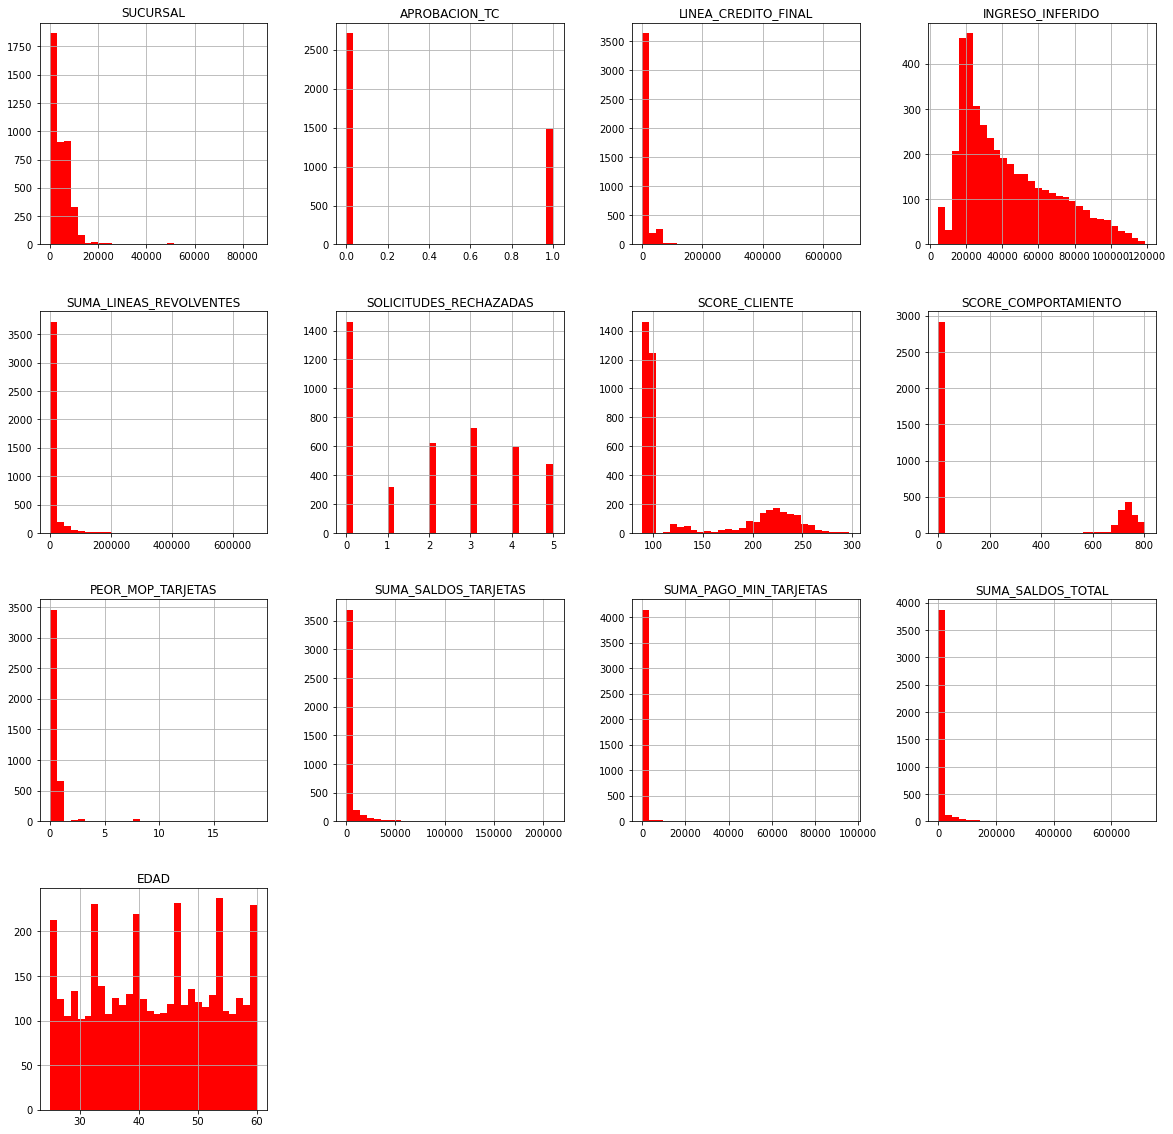

In [14]:
data_bank_df.hist(bins = 30, figsize=(20,20), color = 'r')

<AxesSubplot:>

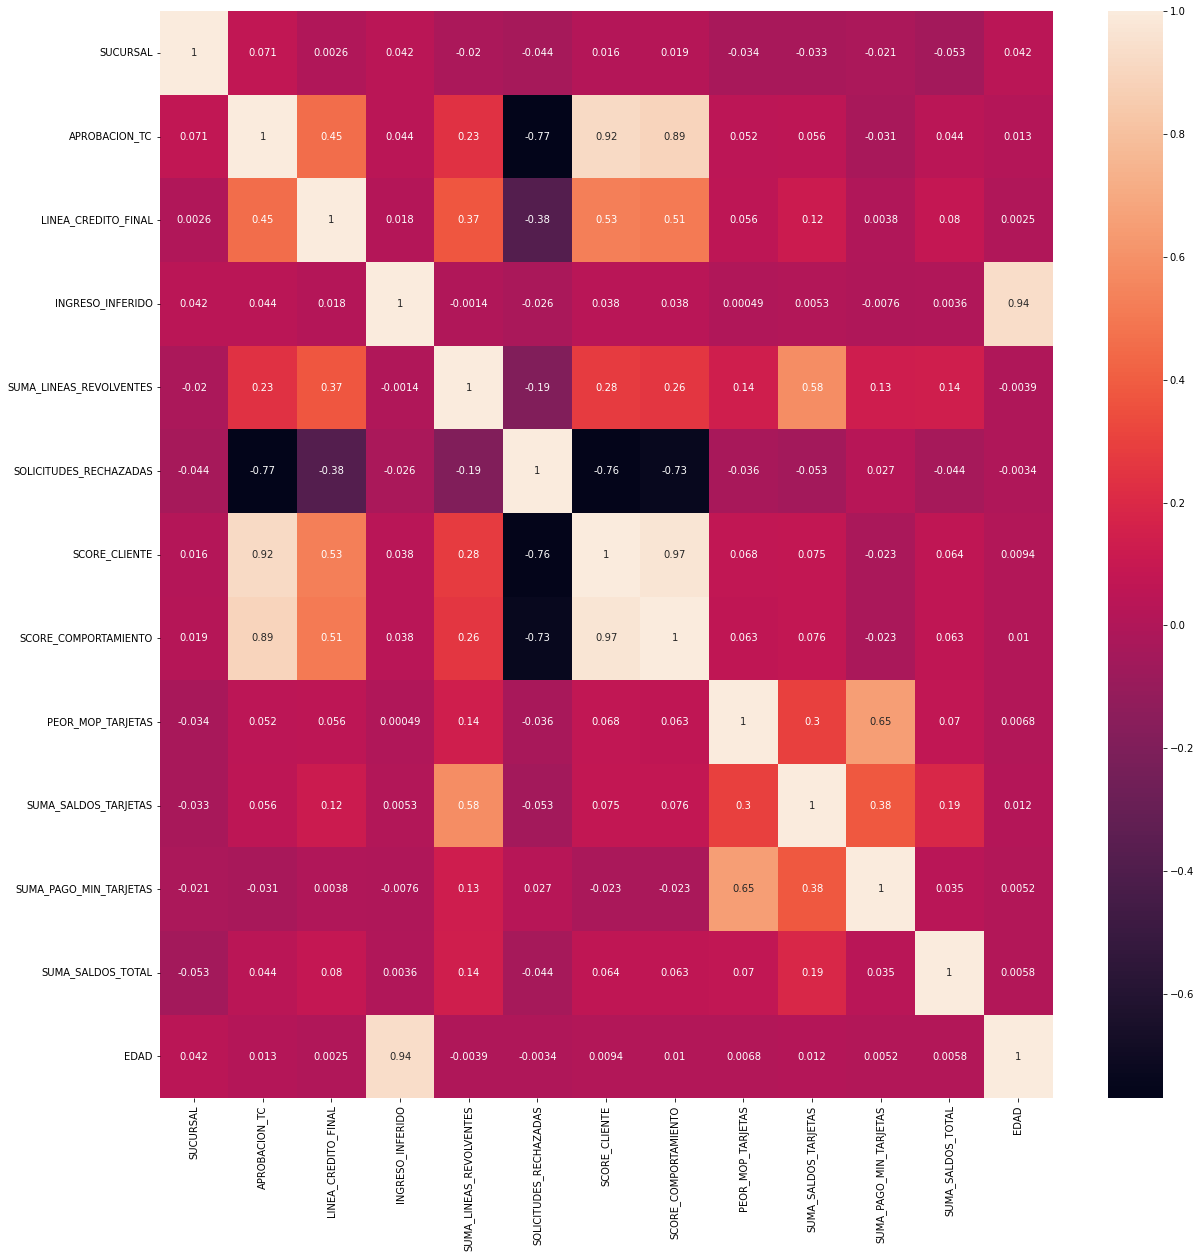

In [27]:
correlations = data_bank_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

<AxesSubplot:xlabel='ESCOLARIDAD', ylabel='count'>

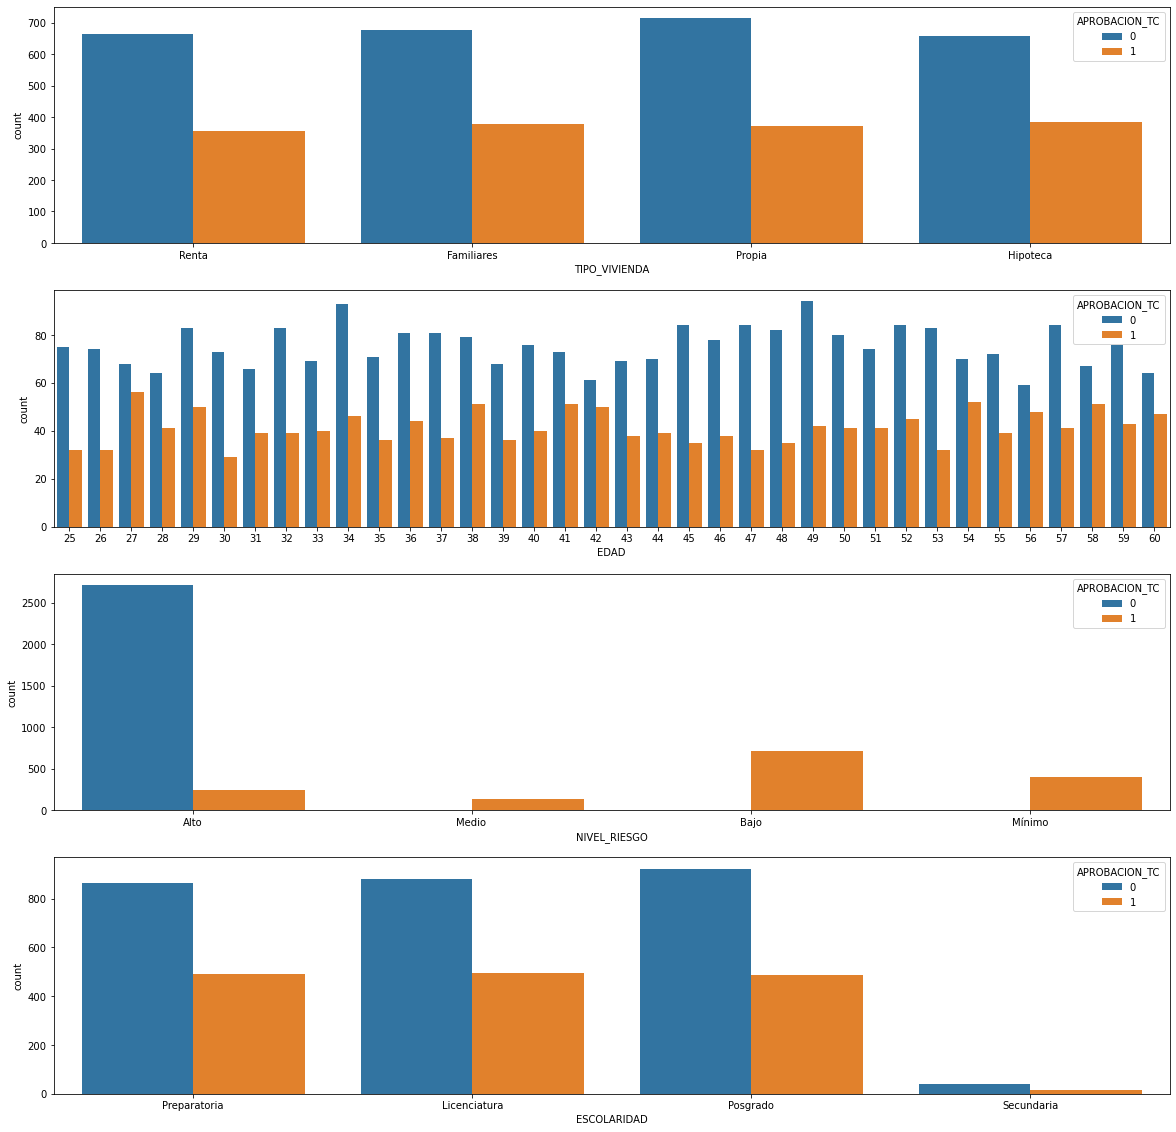

In [28]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'TIPO_VIVIENDA', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(412)
sns.countplot(x = 'EDAD', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(413)
sns.countplot(x = 'NIVEL_RIESGO', hue = 'APROBACION_TC', data = data_bank_df)
plt.subplot(414)
sns.countplot(x = 'ESCOLARIDAD', hue = 'APROBACION_TC', data = data_bank_df)

In [15]:
#Veamos cuántas personas tienen un crédito aceptado y cuántas un crédito rechazado
aprobado_df   = data_bank_df[data_bank_df['APROBACION_TC'] == 1]
rechazado_df  = data_bank_df[data_bank_df['APROBACION_TC'] == 0]

#aprobado_df.to_csv("datos_rechazado.csv")
#rechazado_df.to_csv("datos_aprobado.csv")

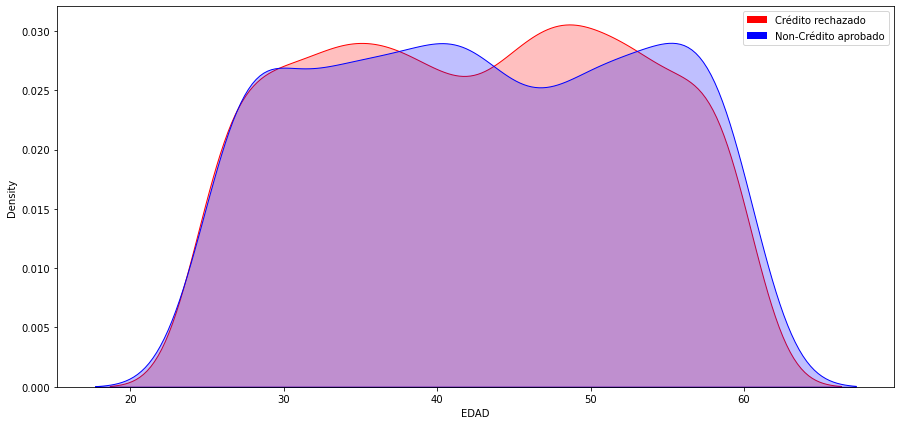

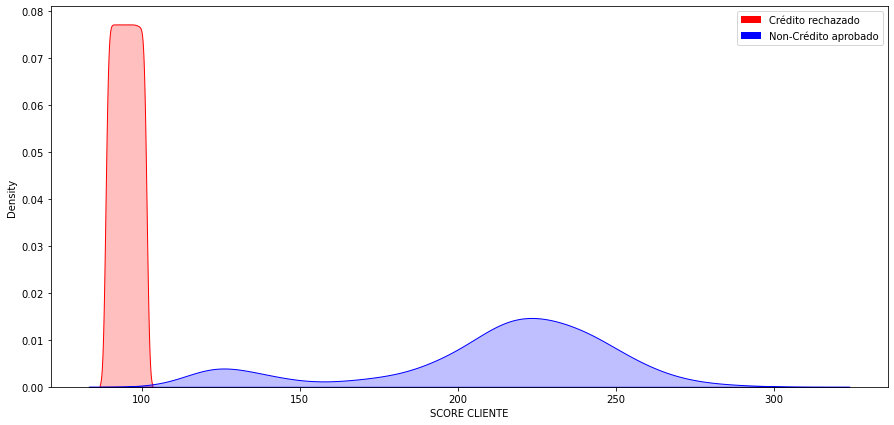

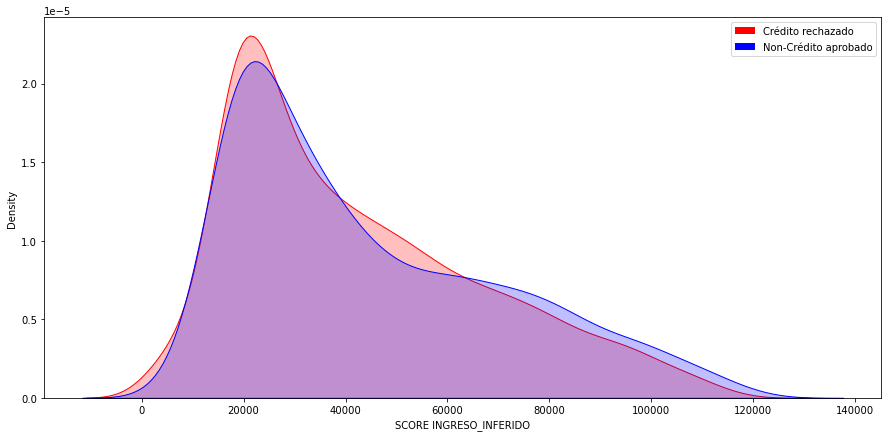

In [48]:
plt.figure(figsize=(15, 7))
sns.kdeplot(rechazado_df['EDAD'], shade = True, color = 'r')
sns.kdeplot(aprobado_df['EDAD'], shade = True, color = 'b')
plt.xlabel('EDAD')
handles = [mpatches.Patch(facecolor='r', label="Crédito rechazado"),
           mpatches.Patch(facecolor='b', label="Non-Crédito aprobado")]
plt.legend(handles=handles)
plt.show()
#---------------------------------
plt.figure(figsize=(15, 7))
sns.kdeplot(rechazado_df['SCORE_CLIENTE'], shade = True, color = 'r')
sns.kdeplot(aprobado_df['SCORE_CLIENTE'], shade = True, color = 'b')
plt.xlabel('SCORE CLIENTE')
handles = [mpatches.Patch(facecolor='r', label="Crédito rechazado"),
           mpatches.Patch(facecolor='b', label="Non-Crédito aprobado")]
plt.legend(handles=handles)
plt.show()
#---------------------------------
plt.figure(figsize=(15, 7))
sns.kdeplot(rechazado_df['INGRESO_INFERIDO'], shade = True, color = 'r')
sns.kdeplot(aprobado_df['INGRESO_INFERIDO'], shade = True, color = 'b')
plt.xlabel('SCORE INGRESO_INFERIDO')
handles = [mpatches.Patch(facecolor='r', label="Crédito rechazado"),
           mpatches.Patch(facecolor='b', label="Non-Crédito aprobado")]
plt.legend(handles=handles)
plt.show()

In [26]:
# Contamos el número de créditos aceptados y rechazados
print("Total de créditos solicitados = ", len(data_bank_df))

print("\nNúmero de créditos rechazados = ", len(rechazado_df))
print("Porcentaje de  créditos rechazados = ", 1.*len(rechazado_df)/len(data_bank_df)*100.0, "%")

print("\nNúmero de créditos aprobados = ", len(aprobado_df))
print("Porcentaje de créditos aprobados = ", 1.*len(aprobado_df)/len(data_bank_df)*100.0, "%")

Total de créditos solicitados =  4200

Número de créditos rechazados =  2712
Porcentaje de  créditos rechazados =  64.57142857142857 %

Número de créditos aprobados =  1488
Porcentaje de créditos aprobados =  35.42857142857142 %


### Comparando los estadísticos

In [17]:
aprobado_df.describe()

,SUCURSAL,APROBACION_TC,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
count,1488.000000,1488.0,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,5222.225806,1.0,28059.375672,44579.620296,20588.592070,0.157258,211.373656,632.094086,0.327285,4730.215054,232.348790,9716.039651,42.798387
std,7241.406464,0.0,44175.304345,26400.228324,43928.088941,0.585180,38.566620,256.794804,0.647593,12999.173446,810.923548,37542.870885,10.474792
min,2.000000,1.0,1.000000,6726.000000,0.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,482.750000,1.0,4999.000000,22325.250000,0.000000,0.000000,198.000000,699.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,4384.000000,1.0,9899.000000,36437.500000,0.000000,0.000000,220.000000,731.000000,0.000000,0.000000,0.000000,0.000000,42.000000
75%,7794.250000,1.0,44999.250000,63344.500000,21825.000000,0.000000,237.000000,755.000000,1.000000,3083.500000,194.000000,0.000000,52.000000
max,86000.000000,1.0,687000.000000,119261.000000,663000.000000,4.000000,297.000000,805.000000,8.000000,138509.000000,17880.000000,448630.000000,60.000000


In [18]:
rechazado_df.describe()

,SUCURSAL,APROBACION_TC,LINEA_CREDITO_FINAL,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
count,2712.000000,2712.0,2712.0,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,4246.301622,0.0,0.0,42259.357670,3913.402286,3.052729,94.990413,0.0,0.230088,3167.809366,426.414454,6579.486357,42.514749
std,6221.587929,0.0,0.0,24963.483273,25330.836962,1.361246,3.738982,0.0,1.006879,13548.236551,3636.837987,32243.453942,10.251637
min,1.000000,0.0,0.0,4500.000000,0.000000,0.000000,89.000000,0.0,0.000000,0.000000,0.000000,0.000000,25.000000
25%,405.000000,0.0,0.0,21566.750000,0.000000,2.000000,92.000000,0.0,0.000000,0.000000,0.000000,0.000000,34.000000
50%,4173.000000,0.0,0.0,35581.000000,0.000000,3.000000,95.000000,0.0,0.000000,0.000000,0.000000,0.000000,43.000000
75%,7527.250000,0.0,0.0,58422.500000,0.000000,4.000000,98.000000,0.0,0.000000,0.000000,0.000000,0.000000,51.000000
max,85000.000000,0.0,0.0,115783.000000,680500.000000,5.000000,101.000000,0.0,19.000000,210437.000000,95758.000000,717380.000000,60.000000


Análisis de los estadísticos: 

## Limpieza de datos

In [50]:
#Eliminamos la columna linea_credito_final, ya que al ser mayor a cero cuando un crédito
#es aprobado, puede alterar los algoritmos

#Eliminamos la columna sucursal que se utilizó en la visualización, para saber si había
#preferencia por parte de alguna sucursal

data_bank_df.drop(["LINEA_CREDITO_FINAL","SUCURSAL"], axis = 1, inplace = True)

## Crear los data sets de entrenamiento y testing

### Vamos a convertir los datos categóricos a numéricos

In [57]:
data_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PUNTO_DECISION           4200 non-null   object
 1   APROBACION_TC            4200 non-null   int64 
 2   TIPO_CTE                 4200 non-null   object
 3   INGRESO_INFERIDO         4200 non-null   int64 
 4   COMPROBANTE_INGRESOS     4200 non-null   object
 5   CLIENTE_CDE              4200 non-null   object
 6   SUMA_LINEAS_REVOLVENTES  4200 non-null   int64 
 7   NIVEL_RIESGO             4200 non-null   object
 8   SOLICITUDES_RECHAZADAS   4200 non-null   int64 
 9   SCORE_CLIENTE            4200 non-null   int64 
 10  SCORE_COMPORTAMIENTO     4200 non-null   int64 
 11  PEOR_MOP_TARJETAS        4200 non-null   int64 
 12  SUMA_SALDOS_TARJETAS     4200 non-null   int64 
 13  SUMA_PAGO_MIN_TARJETAS   4200 non-null   int64 
 14  SUMA_SALDOS_TOTAL        4200 non-null  

In [56]:
datos_cat=data_bank_df[['PUNTO_DECISION',"TIPO_CTE","COMPROBANTE_INGRESOS",
"CLIENTE_CDE","NIVEL_RIESGO","TIPO_VIVIENDA","ESCOLARIDAD"]]

In [59]:
datos_cat.head(1)

,PUNTO_DECISION,TIPO_CTE,COMPROBANTE_INGRESOS,CLIENTE_CDE,NIVEL_RIESGO,TIPO_VIVIENDA,ESCOLARIDAD
0,PS1,MALO,RECIBOS DE NOMINA,NO_CLIENTE,Alto,Renta,Preparatoria


In [60]:
onehotencoder = OneHotEncoder()

In [62]:
datos_transformados = onehotencoder.fit_transform(datos_cat).toarray()
datos_transformados.shape

(4200, 27)

In [65]:
datos_transformados_df = pd.DataFrame(datos_transformados)
datos_transformados_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4196,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Ahora hacemos un df con los datos numéricos y excluimos APROBACION_TC, ya que es la variable objetivo

In [67]:
data_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PUNTO_DECISION           4200 non-null   object
 1   APROBACION_TC            4200 non-null   int64 
 2   TIPO_CTE                 4200 non-null   object
 3   INGRESO_INFERIDO         4200 non-null   int64 
 4   COMPROBANTE_INGRESOS     4200 non-null   object
 5   CLIENTE_CDE              4200 non-null   object
 6   SUMA_LINEAS_REVOLVENTES  4200 non-null   int64 
 7   NIVEL_RIESGO             4200 non-null   object
 8   SOLICITUDES_RECHAZADAS   4200 non-null   int64 
 9   SCORE_CLIENTE            4200 non-null   int64 
 10  SCORE_COMPORTAMIENTO     4200 non-null   int64 
 11  PEOR_MOP_TARJETAS        4200 non-null   int64 
 12  SUMA_SALDOS_TARJETAS     4200 non-null   int64 
 13  SUMA_PAGO_MIN_TARJETAS   4200 non-null   int64 
 14  SUMA_SALDOS_TOTAL        4200 non-null  

In [69]:
datos_num_df=data_bank_df[["INGRESO_INFERIDO","SUMA_LINEAS_REVOLVENTES",
                          "SOLICITUDES_RECHAZADAS","SCORE_CLIENTE","SCORE_COMPORTAMIENTO",
                          "PEOR_MOP_TARJETAS","SUMA_SALDOS_TARJETAS","SUMA_PAGO_MIN_TARJETAS",
                          "SUMA_SALDOS_TOTAL","EDAD"]]

In [70]:
datos_num_df

,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
0,4500,0,5,89,0,0,0,0,0,25
1,4780,0,4,89,0,0,0,0,0,25
2,4520,0,5,89,0,0,0,0,0,25
3,5000,0,4,89,0,1,1665,450,0,25
4,4950,296000,4,89,0,1,30397,1830,17050,25
...,...,...,...,...,...,...,...,...,...,...
4195,113911,0,0,260,708,0,0,0,0,60
4196,100746,0,0,261,734,0,0,0,0,60
4197,86685,0,0,261,761,0,0,0,0,60
4198,118843,0,0,266,783,0,0,0,0,60


In [71]:
#Concatenamos los df de los datos transformados y los datos numéricos
numeric_data = pd.concat([datos_transformados_df, datos_num_df], axis = 1)
numeric_data

,0,1,2,3,4,5,6,7,8,9,...,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4500,0,5,89,0,0,0,0,0,25
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4780,0,4,89,0,0,0,0,0,25
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4520,0,5,89,0,0,0,0,0,25
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5000,0,4,89,0,1,1665,450,0,25
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4950,296000,4,89,0,1,30397,1830,17050,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113911,0,0,260,708,0,0,0,0,60
4196,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100746,0,0,261,734,0,0,0,0,60
4197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86685,0,0,261,761,0,0,0,0,60
4198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,118843,0,0,266,783,0,0,0,0,60


In [72]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        4200 non-null   float64
 1   1                        4200 non-null   float64
 2   2                        4200 non-null   float64
 3   3                        4200 non-null   float64
 4   4                        4200 non-null   float64
 5   5                        4200 non-null   float64
 6   6                        4200 non-null   float64
 7   7                        4200 non-null   float64
 8   8                        4200 non-null   float64
 9   9                        4200 non-null   float64
 10  10                       4200 non-null   float64
 11  11                       4200 non-null   float64
 12  12                       4200 non-null   float64
 13  13                       4200 non-null   float64
 14  14                      

In [73]:
scaler = StandardScaler()
fit_data = scaler.fit_transform(numeric_data)

c:\Users\Omen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Omen\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [75]:
fit_data

fit_data_df=pd.DataFrame(fit_data)
fit_data_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.695395,0.695395,-0.484322,0.662457,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,-1.513010,-0.288238,1.652937,-0.783333,-0.661089,-0.294822,-0.278251,-0.120712,-0.224617,-1.705306
1,-0.695395,0.695395,-0.484322,0.662457,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,-1.502029,-0.288238,1.096972,-0.783333,-0.661089,-0.294822,-0.278251,-0.120712,-0.224617,-1.705306
2,-0.695395,0.695395,-0.484322,0.662457,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,-1.512226,-0.288238,1.652937,-0.783333,-0.661089,-0.294822,-0.278251,-0.120712,-0.224617,-1.705306
3,-0.695395,0.695395,-0.484322,0.662457,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,-1.493402,-0.288238,1.096972,-0.783333,-0.661089,0.819716,-0.153757,0.031165,-0.224617,-1.705306
4,-0.695395,0.695395,-0.484322,0.662457,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,-1.495363,8.398953,1.096972,-0.783333,-0.661089,0.819716,1.994584,0.496922,0.273349,-1.705306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1.438031,-1.438031,2.064742,-1.509533,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,2.777658,-0.288238,-1.126888,2.053188,1.428966,-0.294822,-0.278251,-0.120712,-0.224617,1.682994
4196,1.438031,-1.438031,2.064742,-1.509533,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,2.261378,-0.288238,-1.126888,2.069775,1.505720,-0.294822,-0.278251,-0.120712,-0.224617,1.682994
4197,1.438031,-1.438031,2.064742,-1.509533,-0.360477,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,1.709961,-0.288238,-1.126888,2.069775,1.585425,-0.294822,-0.278251,-0.120712,-0.224617,1.682994
4198,1.438031,-1.438031,-0.484322,-1.509533,2.774104,-0.057831,-0.040859,-0.169279,-0.141987,-0.015432,...,2.971071,-0.288238,-1.126888,2.152715,1.650371,-0.294822,-0.278251,-0.120712,-0.224617,1.682994


In [77]:
#Guardamos nuestra variable con los datos objetivo
y = data_bank_df['APROBACION_TC']
y

0       0
1       0
2       0
3       0
4       0
       ..
4195    1
4196    1
4197    1
4198    1
4199    1
Name: APROBACION_TC, Length: 4200, dtype: int64

### Entrenar y evaluar el modelo usando regresión logística

In [78]:
x_train, x_test, y_train, y_test = train_test_split(fit_data, y, test_size = 0.30)

In [79]:
print(x_train.shape,x_test.shape)

(2940, 37) (1260, 37)


In [80]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [81]:
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [82]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 99.44444444444444 %


<AxesSubplot:>

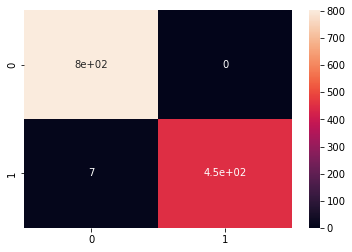

In [83]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       803
           1       1.00      0.98      0.99       457

    accuracy                           0.99      1260
   macro avg       1.00      0.99      0.99      1260
weighted avg       0.99      0.99      0.99      1260



## Entrenar y evaluar un clasificador utilizando bosques aleatorios 


In [85]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = model.predict(x_test)

<AxesSubplot:>

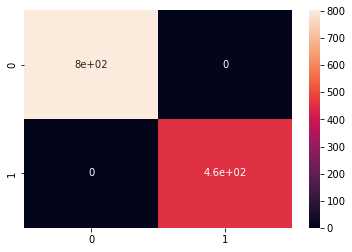

In [87]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       457

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260



## Crear clusters aplicando kmeans

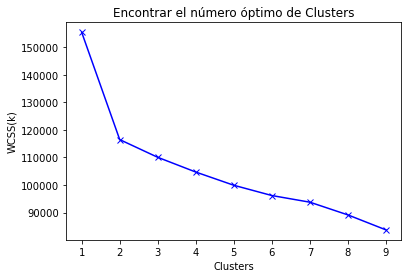

In [90]:
scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(fit_data)
    scores_1.append(kmeans.inertia_) 


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [91]:
kmeans = KMeans(3)
kmeans.fit(fit_data)
labels = kmeans.labels_

In [92]:
kmeans.cluster_centers_.shape

(3, 37)

In [95]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[numeric_data.columns])
cluster_centers

,0,1,2,3,4,5,6,7,8,9,...,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
0,-0.631078,0.631078,-0.484322,0.662457,-0.360477,0.007548,-0.015663,-0.033964,-0.001686,-0.015432,...,-0.025253,-0.173196,0.487106,-0.640731,-0.661089,-0.049692,-0.054308,0.014664,-0.043463,-0.006530
1,1.438031,-1.438031,0.389385,-1.509533,1.699707,0.003474,0.045768,0.120598,0.023037,0.099082,...,0.093209,0.179536,-1.108225,1.439027,1.529321,0.091131,0.020705,-0.063358,-0.005498,0.040156
2,1.438031,-1.438031,1.669013,-1.509533,0.126150,-0.033567,0.027715,0.043192,-0.011353,-0.015432,...,0.029311,0.564953,-1.111337,1.476650,1.488284,0.130729,0.205324,-0.009713,0.181790,-0.005131


In [96]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[numeric_data.columns])
cluster_centers

,0,1,2,3,4,5,6,7,8,9,...,INGRESO_INFERIDO,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD
0,0.030147,9.698527e-01,2.775558e-16,1.000000e+00,2.636780e-16,0.003768,0.001028,0.022268,0.019527,-3.523657e-19,...,42437.448099,3919.854402,2.903049,97.596780,-6.821210e-13,0.219938,2995.024323,401.108941,6202.583419,42.547790
1,1.000000,1.110223e-16,3.427562e-01,-5.551115e-16,6.572438e-01,0.003534,0.003534,0.047703,0.022968,1.766784e-03,...,45458.208481,15938.535336,0.033569,222.975265,7.419947e+02,0.346290,3998.263251,169.936396,7502.466431,43.030035
2,1.000000,2.220446e-16,8.447552e-01,-8.881784e-16,1.552448e-01,0.001399,0.002797,0.034965,0.018182,1.626303e-19,...,43828.805594,29070.917483,0.027972,225.243357,7.280937e+02,0.381818,6467.365035,328.881119,13915.100699,42.562238


In [97]:
y_kmeans = kmeans.fit_predict(fit_data)
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [100]:
# Concatenamos las etiquetas de los clusters con el dataset original 
creditcard_df_cluster = pd.concat([numeric_data, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,...,SUMA_LINEAS_REVOLVENTES,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,SUMA_SALDOS_TOTAL,EDAD,cluster
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,89,0,0,0,0,0,25,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,89,0,0,0,0,0,25,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,89,0,0,0,0,0,25,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,89,0,1,1665,450,0,25,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,296000,4,89,0,1,30397,1830,17050,25,0


## Visualización usando componentes principales

In [101]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(fit_data)
principal_comp

array([[-2.4810901 , -0.91869228],
       [-2.32797702, -0.70472272],
       [-2.463056  , -0.72720797],
       ...,
       [ 5.05414924, -1.84095538],
       [ 5.03865249, -1.82335891],
       [ 5.56663267,  1.35911841]])

In [102]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-2.481090,-0.918692
1,-2.327977,-0.704723
2,-2.463056,-0.727208
3,-2.312860,-0.333992
4,-1.292586,3.827611


In [103]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-2.481090,-0.918692,0
1,-2.327977,-0.704723,0
2,-2.463056,-0.727208,0
3,-2.312860,-0.333992,0
4,-1.292586,3.827611,0


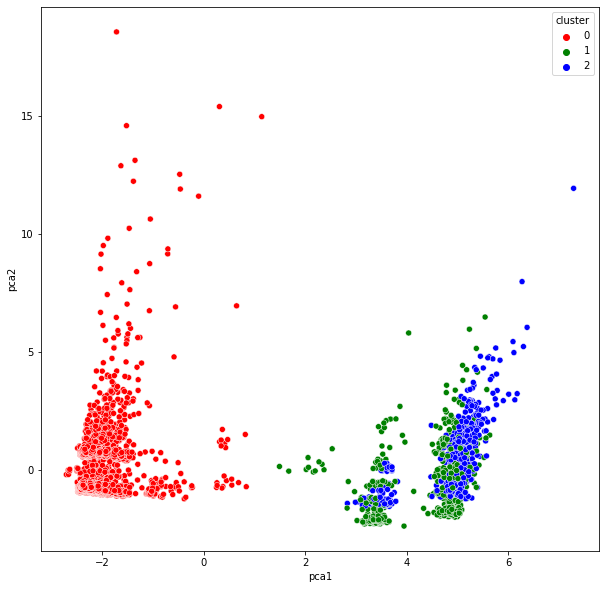

In [104]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue"])
plt.show()